# Investigating the high-metallicity tail of the low-$\alpha$ sequence

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from apogee_sample import APOGEESample
from multizone_stars import MultizoneStars
import paths
from utils import get_bin_centers

## APOGEE

In [2]:
plt.style.use(paths.styles / 'paper.mplstyle')
full_sample = APOGEESample.load()
local_sample = full_sample.region(galr_lim=(7, 9), absz_lim=(0, 2))

Abundance diagram inset

In [3]:
inset_extent = [0.1, 0.4, -0.05, 0.15]

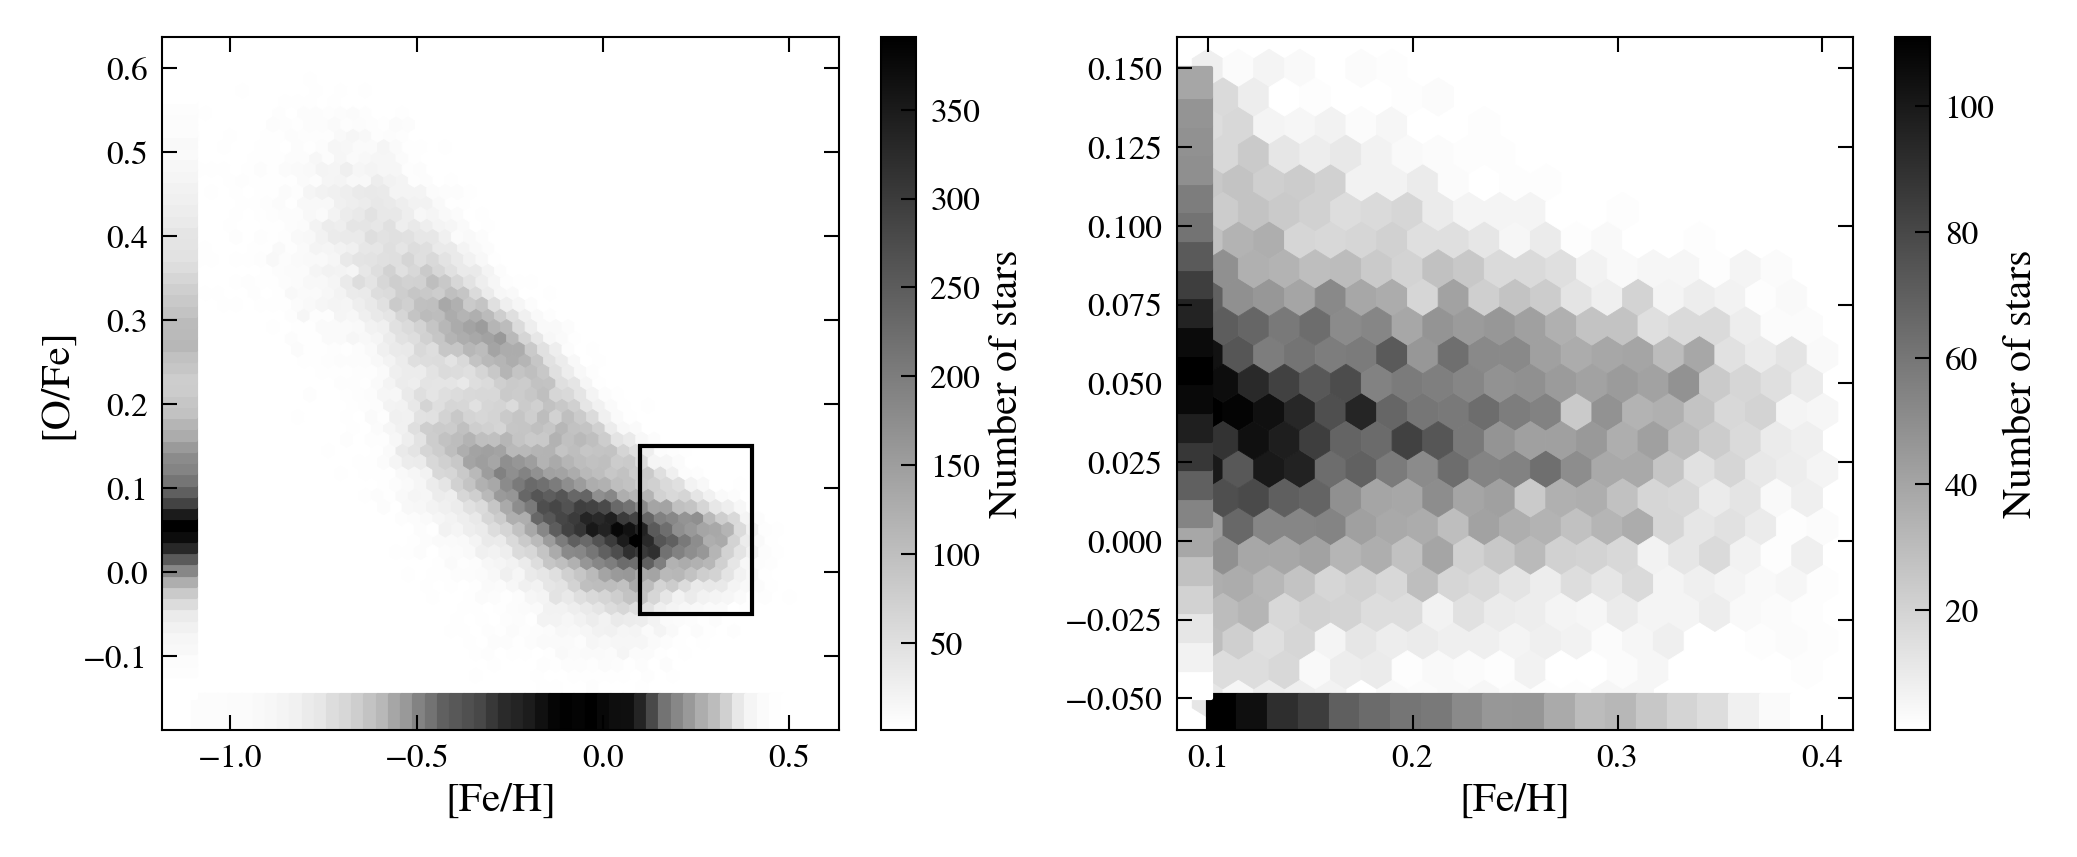

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=np.ones(local_sample.nstars),
    reduce_C_function=np.sum,
    gridsize=50, cmap='binary', linewidths=0.2,
    extent=[-1.1, 0.55, -0.15, 0.6],
    marginals=True
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=np.ones(local_sample.nstars),
    reduce_C_function=np.sum,
    gridsize=20, cmap='binary', linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

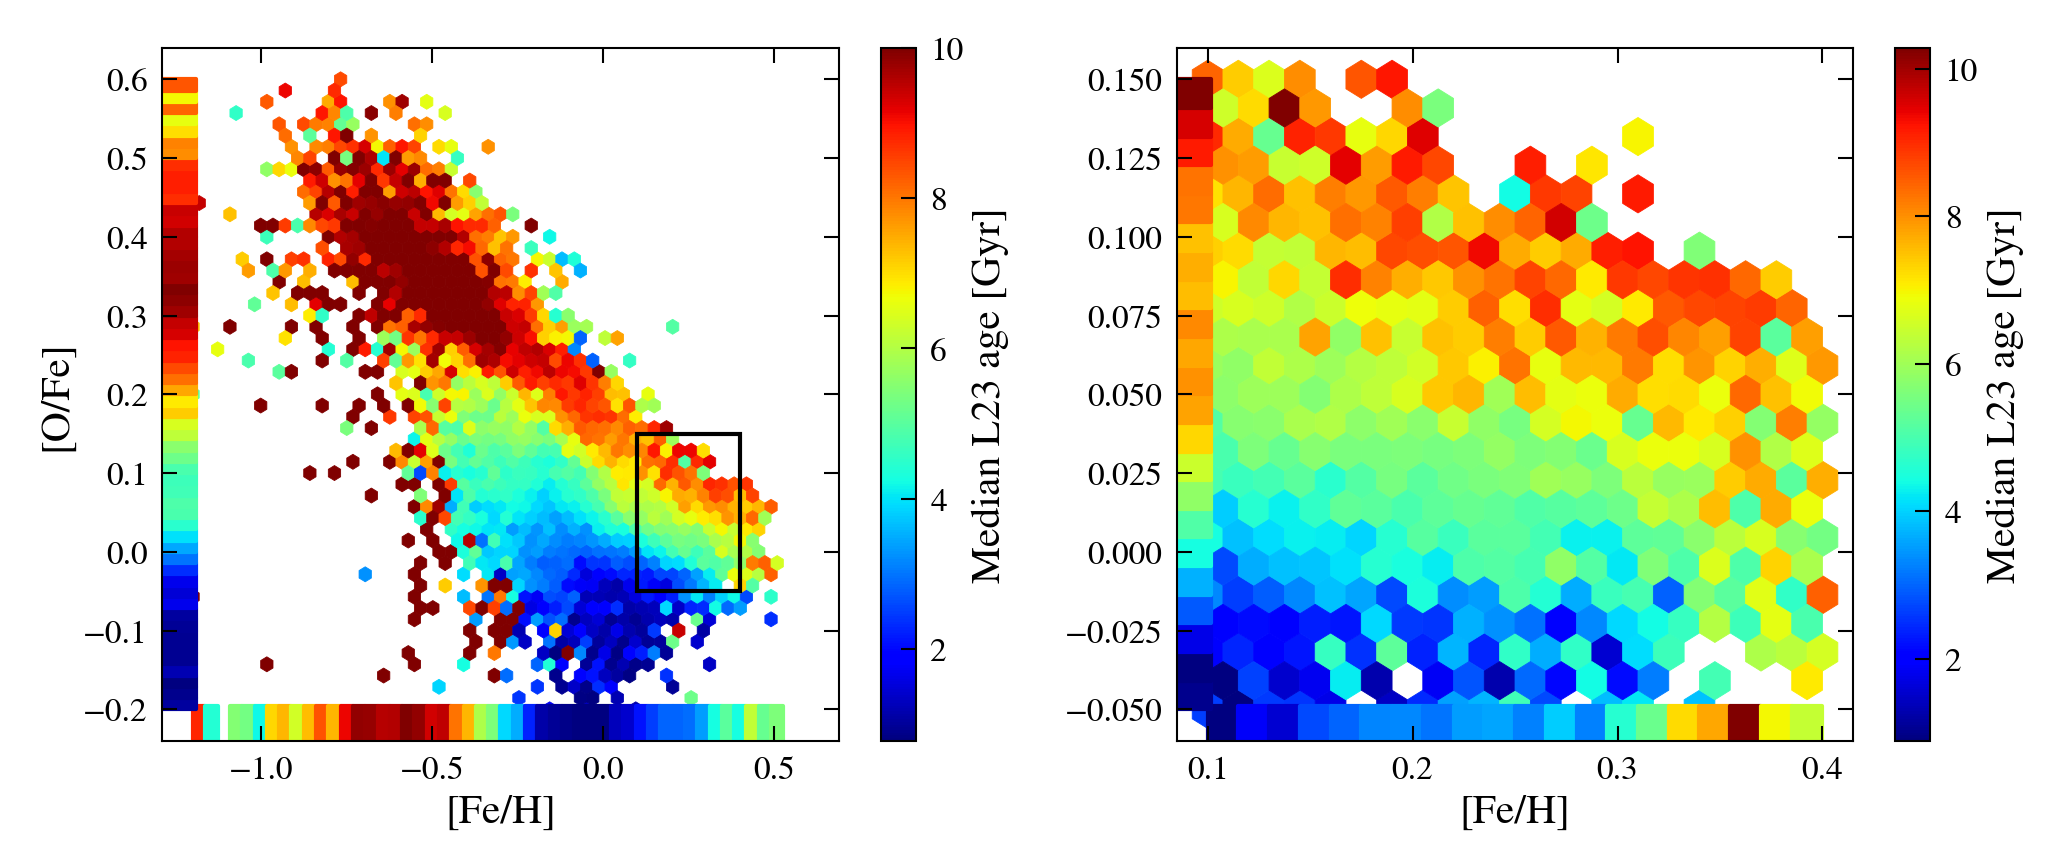

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('L23_AGE'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True, vmax=10
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('L23_AGE'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median L23 age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

Median age vs [O/Fe] for mono-metallicity bins

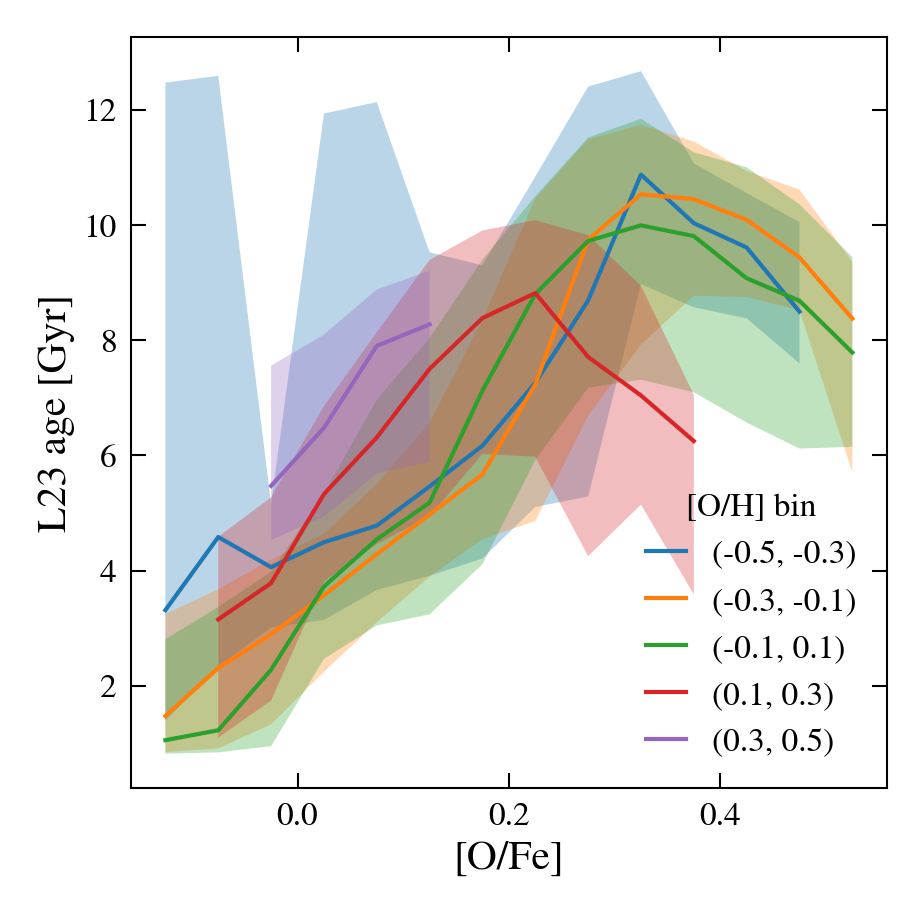

In [33]:
fig, ax = plt.subplots()
oh_bins = np.arange(-0.5, 0.7, 0.2)
ofe_bins = np.arange(-0.15, 0.6, 0.05)
min_counts = 10 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = local_sample.filter({'O_H': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('L23_AGE', 'O_FE', ofe_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    ax.fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    ax.plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
ax.set_xlabel('[O/Fe]')
ax.set_ylabel('L23 age [Gyr]')
ax.legend(title='[O/H] bin')
plt.show()

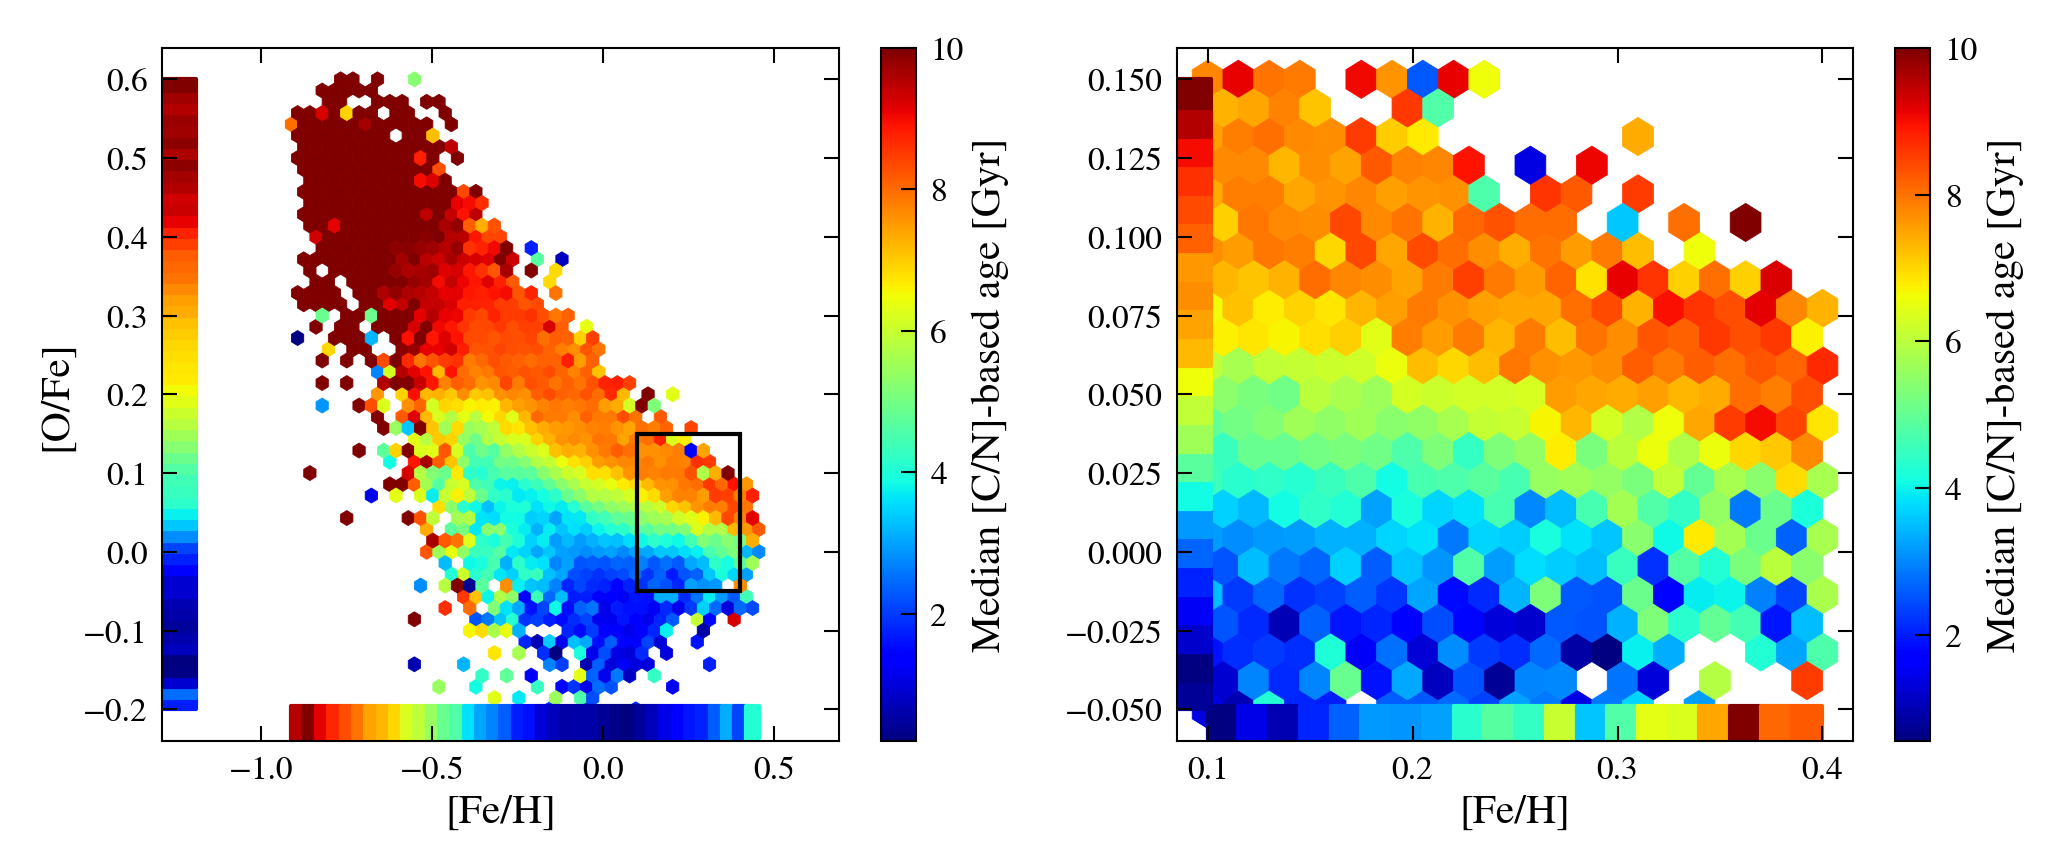

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('CN_AGE'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True, vmax=10
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median [C/N]-based age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    local_sample('FE_H'), local_sample('O_FE'),
    C=local_sample('CN_AGE'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True, vmax=10
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median [C/N]-based age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

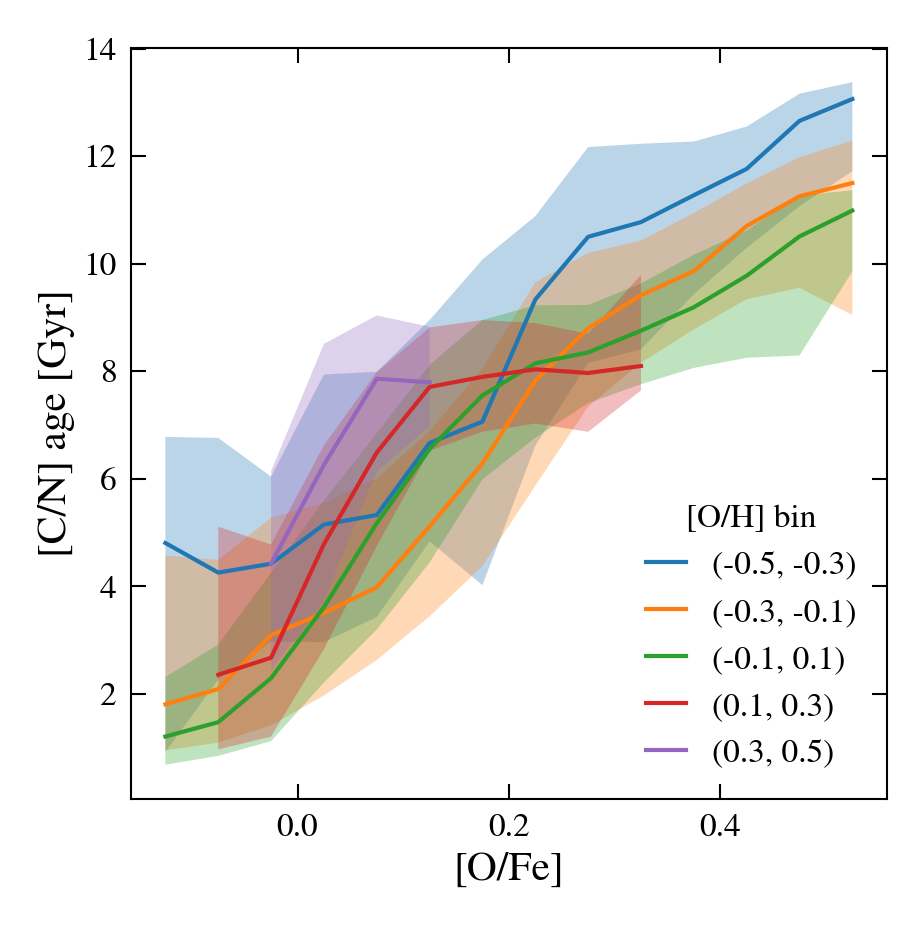

In [34]:
fig, ax = plt.subplots()
oh_bins = np.arange(-0.5, 0.7, 0.2)
ofe_bins = np.arange(-0.15, 0.6, 0.05)
min_counts = 10 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = local_sample.filter({'O_H': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('CN_AGE', 'O_FE', ofe_bins)
    age_intervals[age_intervals['count'] < min_counts] = np.nan
    ax.fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    ax.plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
ax.set_xlabel('[O/Fe]')
ax.set_ylabel('[C/N] age [Gyr]')
ax.legend(title='[O/H] bin')
plt.show()

Age distribution of the inset

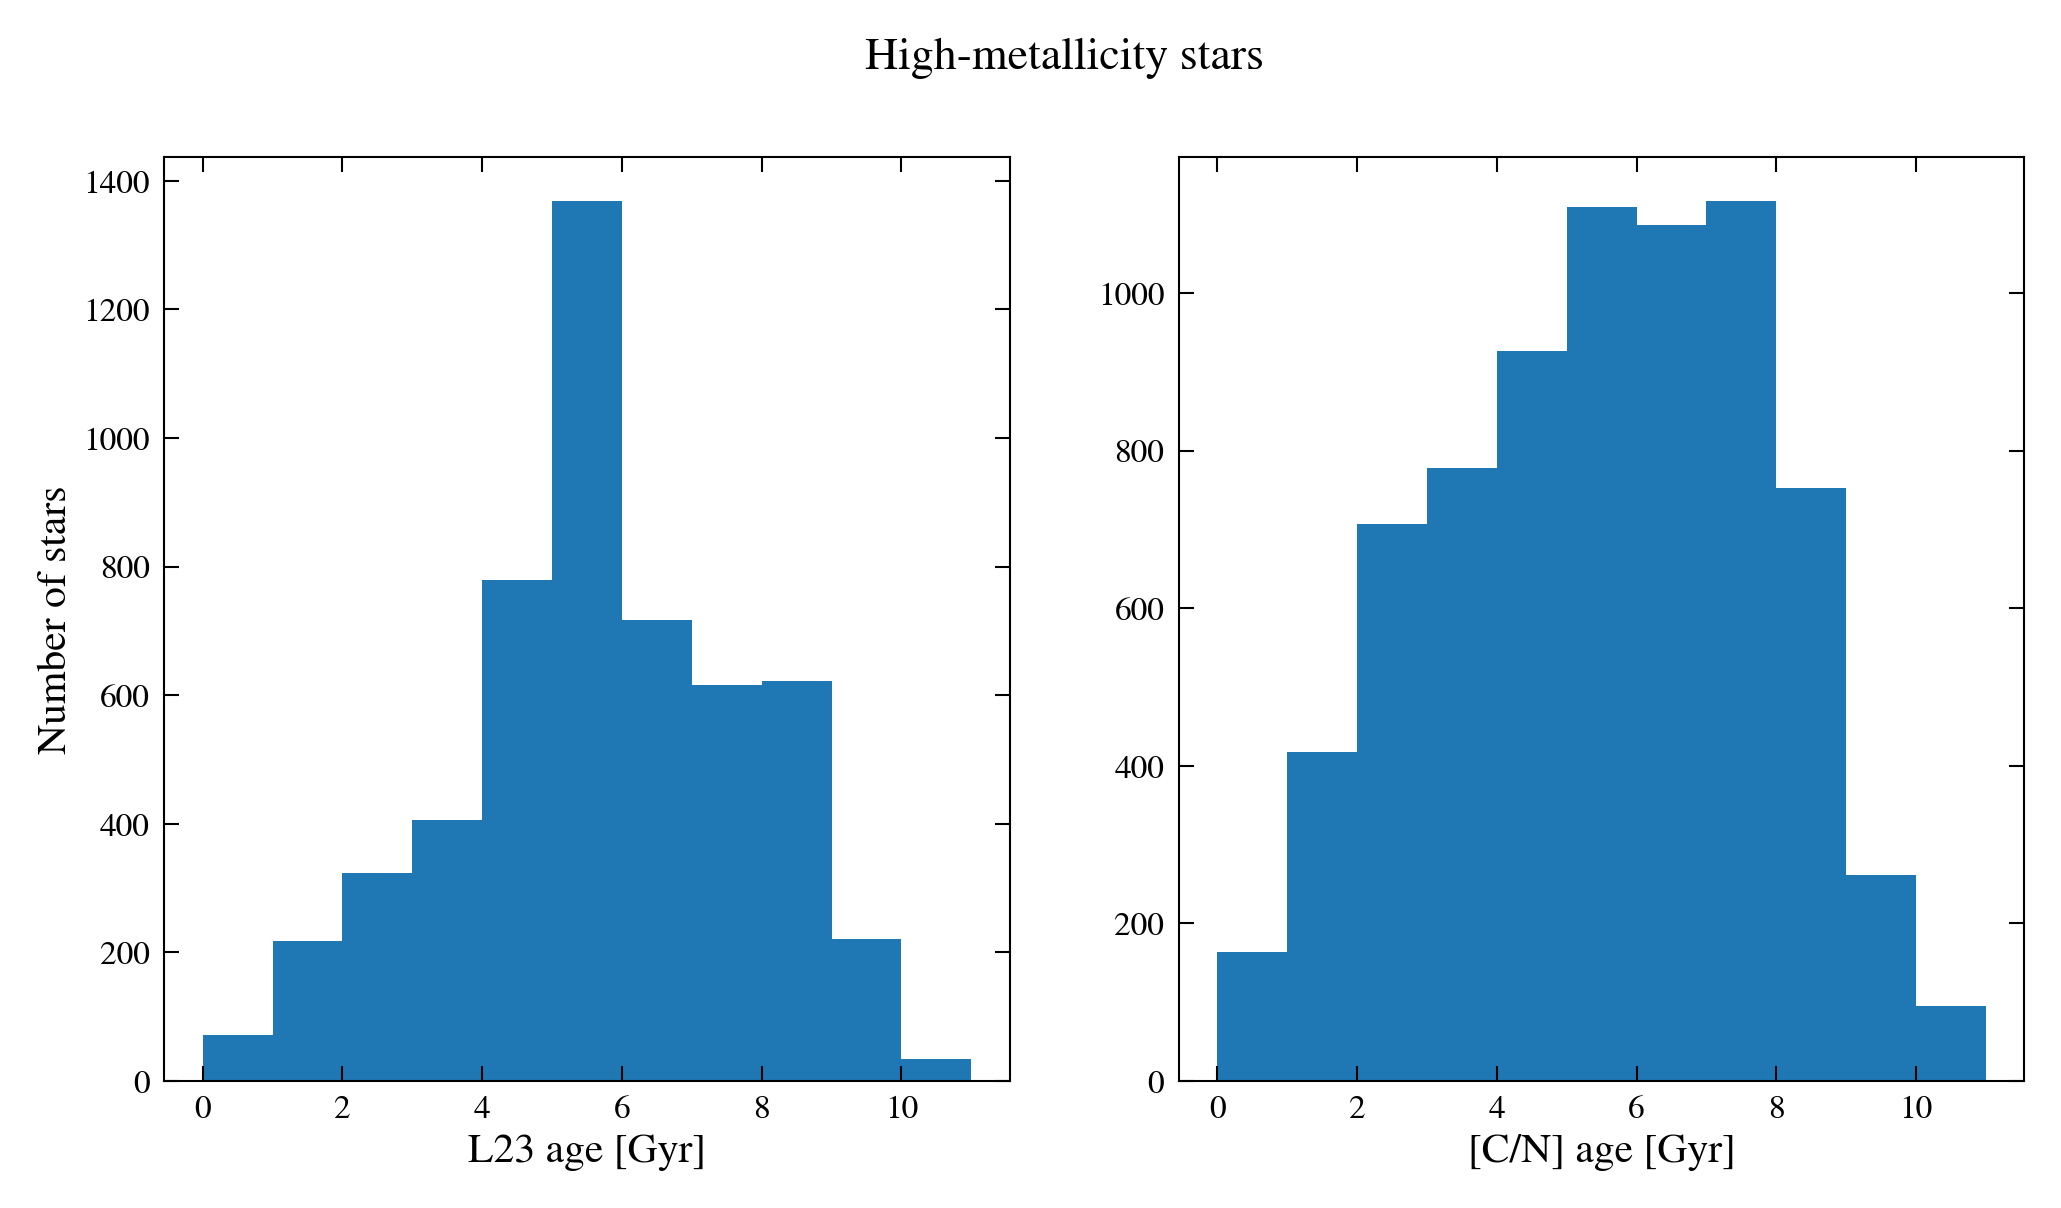

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
local_inset = local_sample.data[
    (local_sample.data['FE_H'] >= inset_extent[0]) &
    (local_sample.data['FE_H'] < inset_extent[1]) &
    (local_sample.data['O_FE'] >= inset_extent[2]) &
    (local_sample.data['O_FE'] < inset_extent[3])
].copy()
axs[0].hist(local_inset['L23_AGE'], bins=np.arange(0, 12, 1))
axs[1].hist(local_inset['CN_AGE'], bins=np.arange(0, 12, 1))
axs[0].set_xlabel('L23 age [Gyr]')
axs[1].set_xlabel('[C/N] age [Gyr]')
axs[0].set_ylabel('Number of stars')
fig.suptitle('High-metallicity stars')
plt.show()

## Multi-zone model (Two-infall)

In [36]:
mzs = MultizoneStars.from_output('yZ2/best/cgm07_ratio025/diskmodel')
mzs.model_uncertainty(full_sample.data, inplace=True)
mzs_local = mzs.region(galr_lim=(7, 9), absz_lim=(0, 2))

In [37]:
inset_extent = [0.1, 0.4, -0.05, 0.15]
cmap = 'Blues'

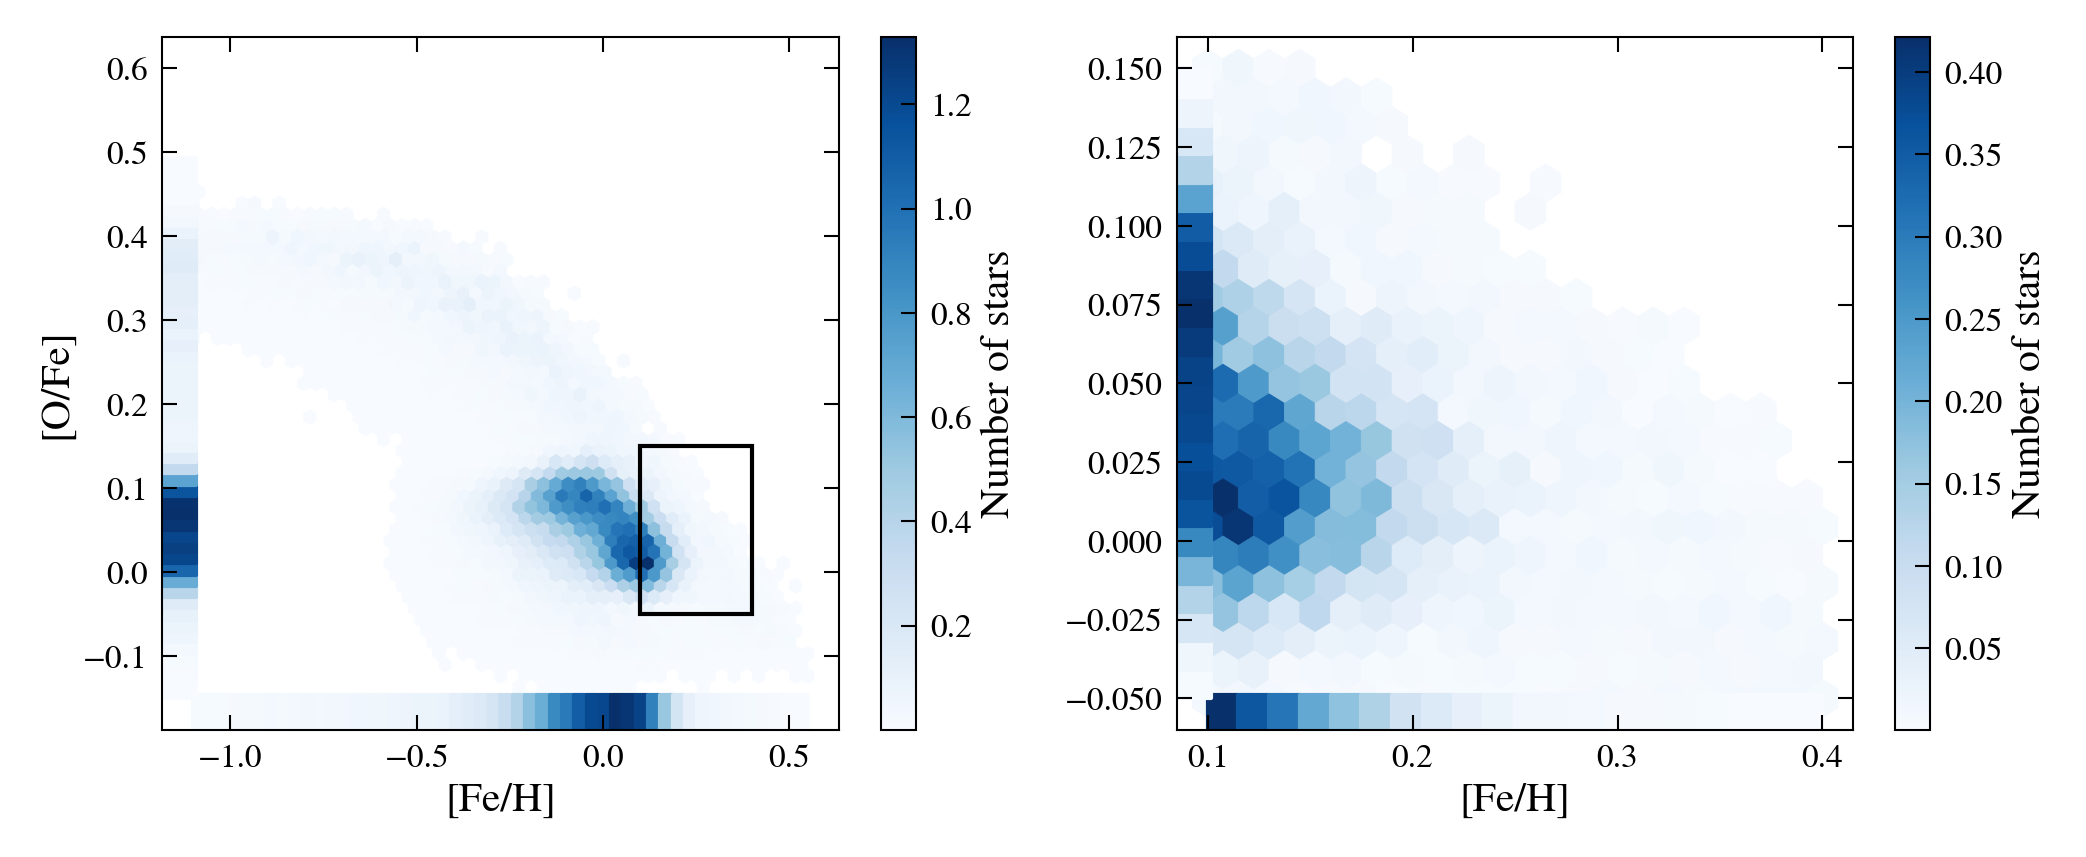

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
# Full abundance plot
pcm0 = axs[0].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=100 * mzs_local('mstar') / mzs_local('mstar').sum(),
    reduce_C_function=np.sum,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.1, 0.55, -0.15, 0.6],
    marginals=True
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
# Zoom-in
pcm1 = axs[1].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=100 * mzs_local('mstar') / mzs_local('mstar').sum(),
    reduce_C_function=np.sum,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True
)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Number of stars')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

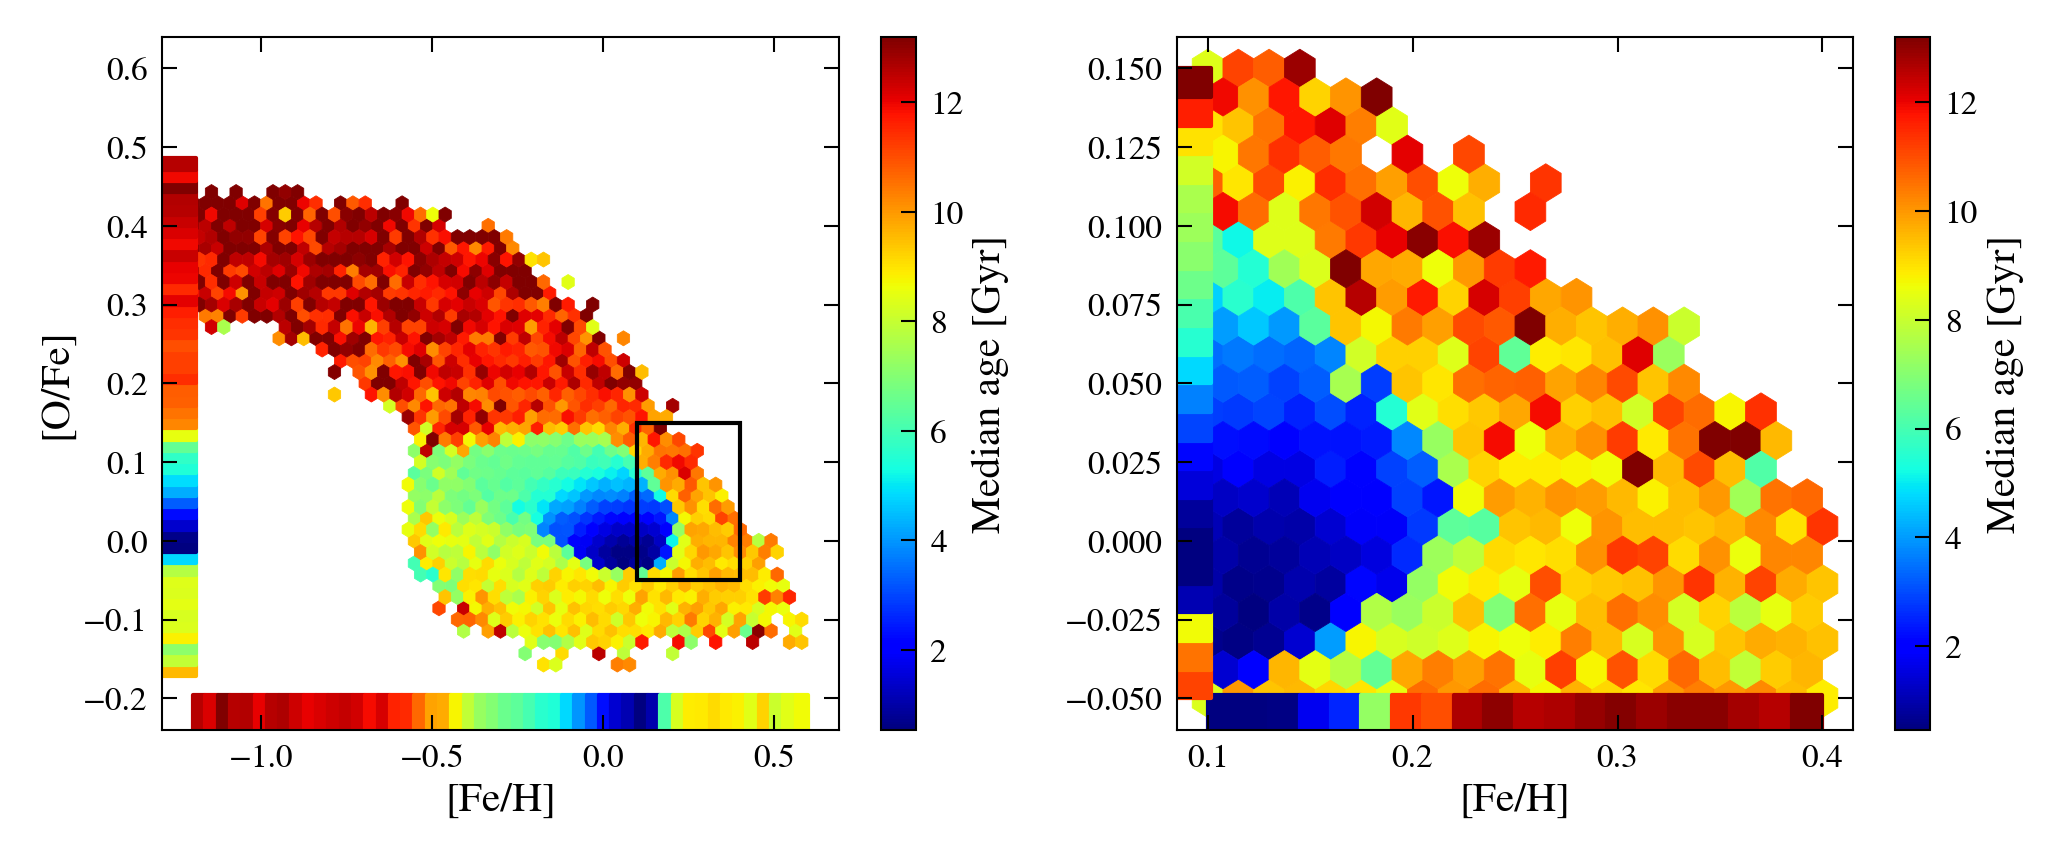

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
cmap = 'jet'
# Full abundance plot
pcm0 = axs[0].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=mzs_local('age'),
    reduce_C_function=np.median,
    gridsize=50, cmap=cmap, linewidths=0.2,
    extent=[-1.2, 0.6, -0.2, 0.6],
    marginals=True,
    vmax=13.2
)
rect = patches.Rectangle(
    (inset_extent[0], inset_extent[2]), 
    inset_extent[1] - inset_extent[0], 
    inset_extent[3] - inset_extent[2], 
    edgecolor='k', facecolor='none'
)
axs[0].add_patch(rect)
# cax = axs[0].inset_axes([0.95, 0.05, 0.05, 0.9])
cbar = fig.colorbar(pcm0, ax=axs[0], orientation='vertical')
cbar.ax.set_ylabel('Median age [Gyr]')
# Zoom-in
pcm1 = axs[1].hexbin(
    mzs_local('[fe/h]'), mzs_local('[o/fe]'),
    C=mzs_local('age'),
    reduce_C_function=np.median,
    gridsize=20, cmap=cmap, linewidths=0.2,
    extent=inset_extent,
    marginals=True,
    vmax=13.2
)
# pc1 = axs[1].scatter(
#     local_sample('FE_H'), local_sample('O_FE'),
#     c=local_sample('L23_AGE'),
#     vmax=9,
#     s=10, marker='.', cmap=cmap
# )
# axs[1].set_xlim((0.2, 0.5))
# axs[1].set_ylim((-0.05, 0.15))
cbar = fig.colorbar(pcm1, ax=axs[1], orientation='vertical')
cbar.ax.set_ylabel('Median age [Gyr]')
axs[0].set_xlabel('[Fe/H]')
axs[1].set_xlabel('[Fe/H]')
axs[0].set_ylabel('[O/Fe]')
plt.show()

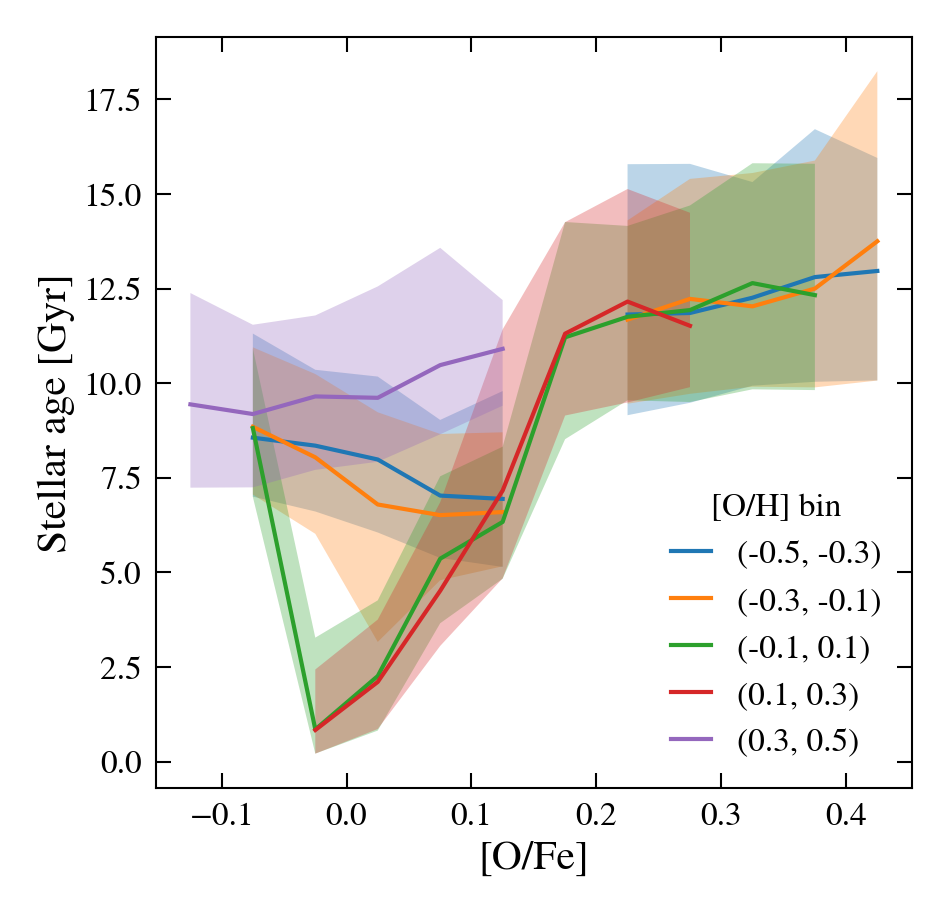

In [40]:
fig, ax = plt.subplots()
oh_bins = np.arange(-0.5, 0.7, 0.2)
ofe_bins = np.arange(-0.15, 0.6, 0.05)
min_frac = 0.01 # threshold number of counts per bin for plotting
for i in range(len(oh_bins)-1):
    oh_lim = tuple(oh_bins[i:i+2])
    mono_z_pop = mzs_local.filter({'[o/h]': oh_lim})
    age_intervals = mono_z_pop.binned_intervals('age', '[o/fe]', ofe_bins)
    age_intervals[age_intervals['mass_fraction'] < min_frac] = np.nan
    ax.fill_between(get_bin_centers(ofe_bins), age_intervals[0.16], age_intervals[0.84], alpha=0.3)
    ax.plot(get_bin_centers(ofe_bins), age_intervals[0.5], 
            label=f'({round(oh_lim[0], 2)}, {round(oh_lim[1], 2)})')
ax.set_xlabel('[O/Fe]')
ax.set_ylabel('Stellar age [Gyr]')
ax.legend(title='[O/H] bin')
plt.show()

See also Spitoni et al. (2024), figure 11

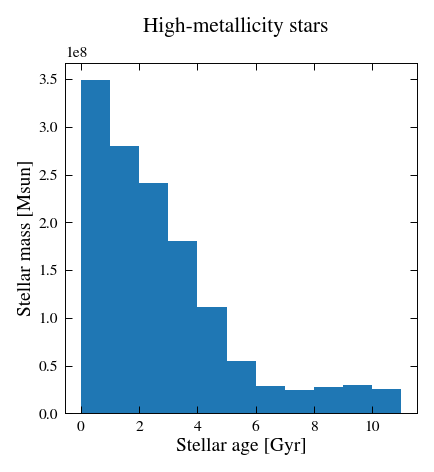

In [12]:
fig, ax = plt.subplots(dpi=140)
local_inset = mzs_local.stars[
    (mzs_local.stars['[fe/h]'] >= inset_extent[0]) &
    (mzs_local.stars['[fe/h]'] < inset_extent[1]) &
    (mzs_local.stars['[o/fe]'] >= inset_extent[2]) &
    (mzs_local.stars['[o/fe]'] < inset_extent[3])
].copy()
ax.hist(local_inset['age'], bins=np.arange(0, 12, 1), weights=local_inset['mstar'])
ax.set_xlabel('Stellar age [Gyr]')
ax.set_ylabel('Stellar mass [Msun]')
fig.suptitle('High-metallicity stars')
plt.show()